# Creating your own dtaset from Google Images

In [1]:
from fastai.vision import *

In [20]:
folder = 'hyena'
file = 'urls_hyena.csv'

In [17]:
folder = 'leopard'
file = 'urls_leopard.csv'

In [13]:
folder = 'tiger'
file = 'urls_tiger.csv'

In [8]:
folder = 'lion'
file = 'urls_lion.csv'

In [21]:
path = Path('data/predators')
dest = path/folder
dest.mkdir(parents=True, exist_ok = True)

In [10]:
path.ls()

[PosixPath('data/predators/lion'),
 PosixPath('data/predators/hyena'),
 PosixPath('data/predators/tiger'),
 PosixPath('data/predators/urls_leopard.csv'),
 PosixPath('data/predators/leopard'),
 PosixPath('data/predators/urls_hyena.csv'),
 PosixPath('data/predators/urls_tiger.csv'),
 PosixPath('data/predators/urls_lion.csv')]

In [15]:
classes = ['hyena','leopard','tiger','lion']

In [22]:
download_images(path/file, dest, max_pics=500)

In [23]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [24]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [25]:
data.classes

['hyena', 'leopard', 'lion', 'tiger']

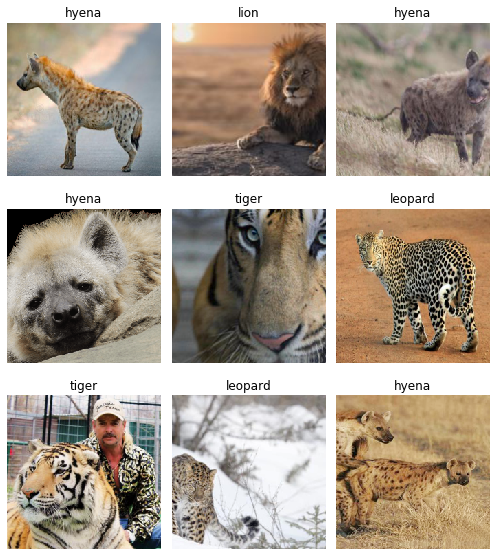

In [26]:
data.show_batch(rows=3, figsize=(7,8))

In [27]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['hyena', 'leopard', 'lion', 'tiger'], 4, 1189, 297)

In [28]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [43]:
%time learn.fit_one_cycle(6)

CPU times: user 1min 22s, sys: 1min 5s, total: 2min 27s
Wall time: 38.5 s


In [44]:
learn.save('stage-1')

In [45]:
learn.unfreeze()

In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


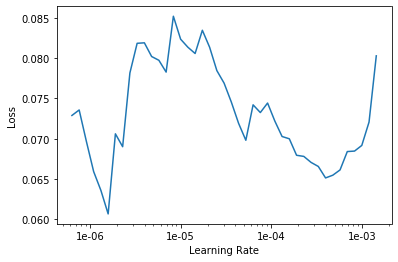

In [48]:
learn.recorder.plot()

In [49]:
learn.fit_one_cycle(2, max_lr=slice(2e-5,2e-4))

In [50]:
learn.save('stage-2')

# Interpretation

In [51]:
learn.load('stage-2');

In [52]:
interp = ClassificationInterpretation.from_learner(learn)

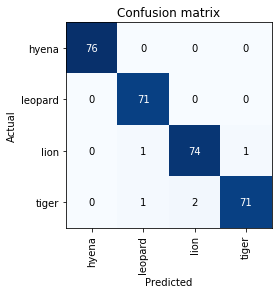

In [53]:
interp.plot_confusion_matrix()

In [54]:
from fastai.widgets import *

In [55]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [88]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                   .split_none()
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [89]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [90]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [91]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [76]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [92]:
learn.export()

In [93]:
defaults.device = torch.device('cpu')

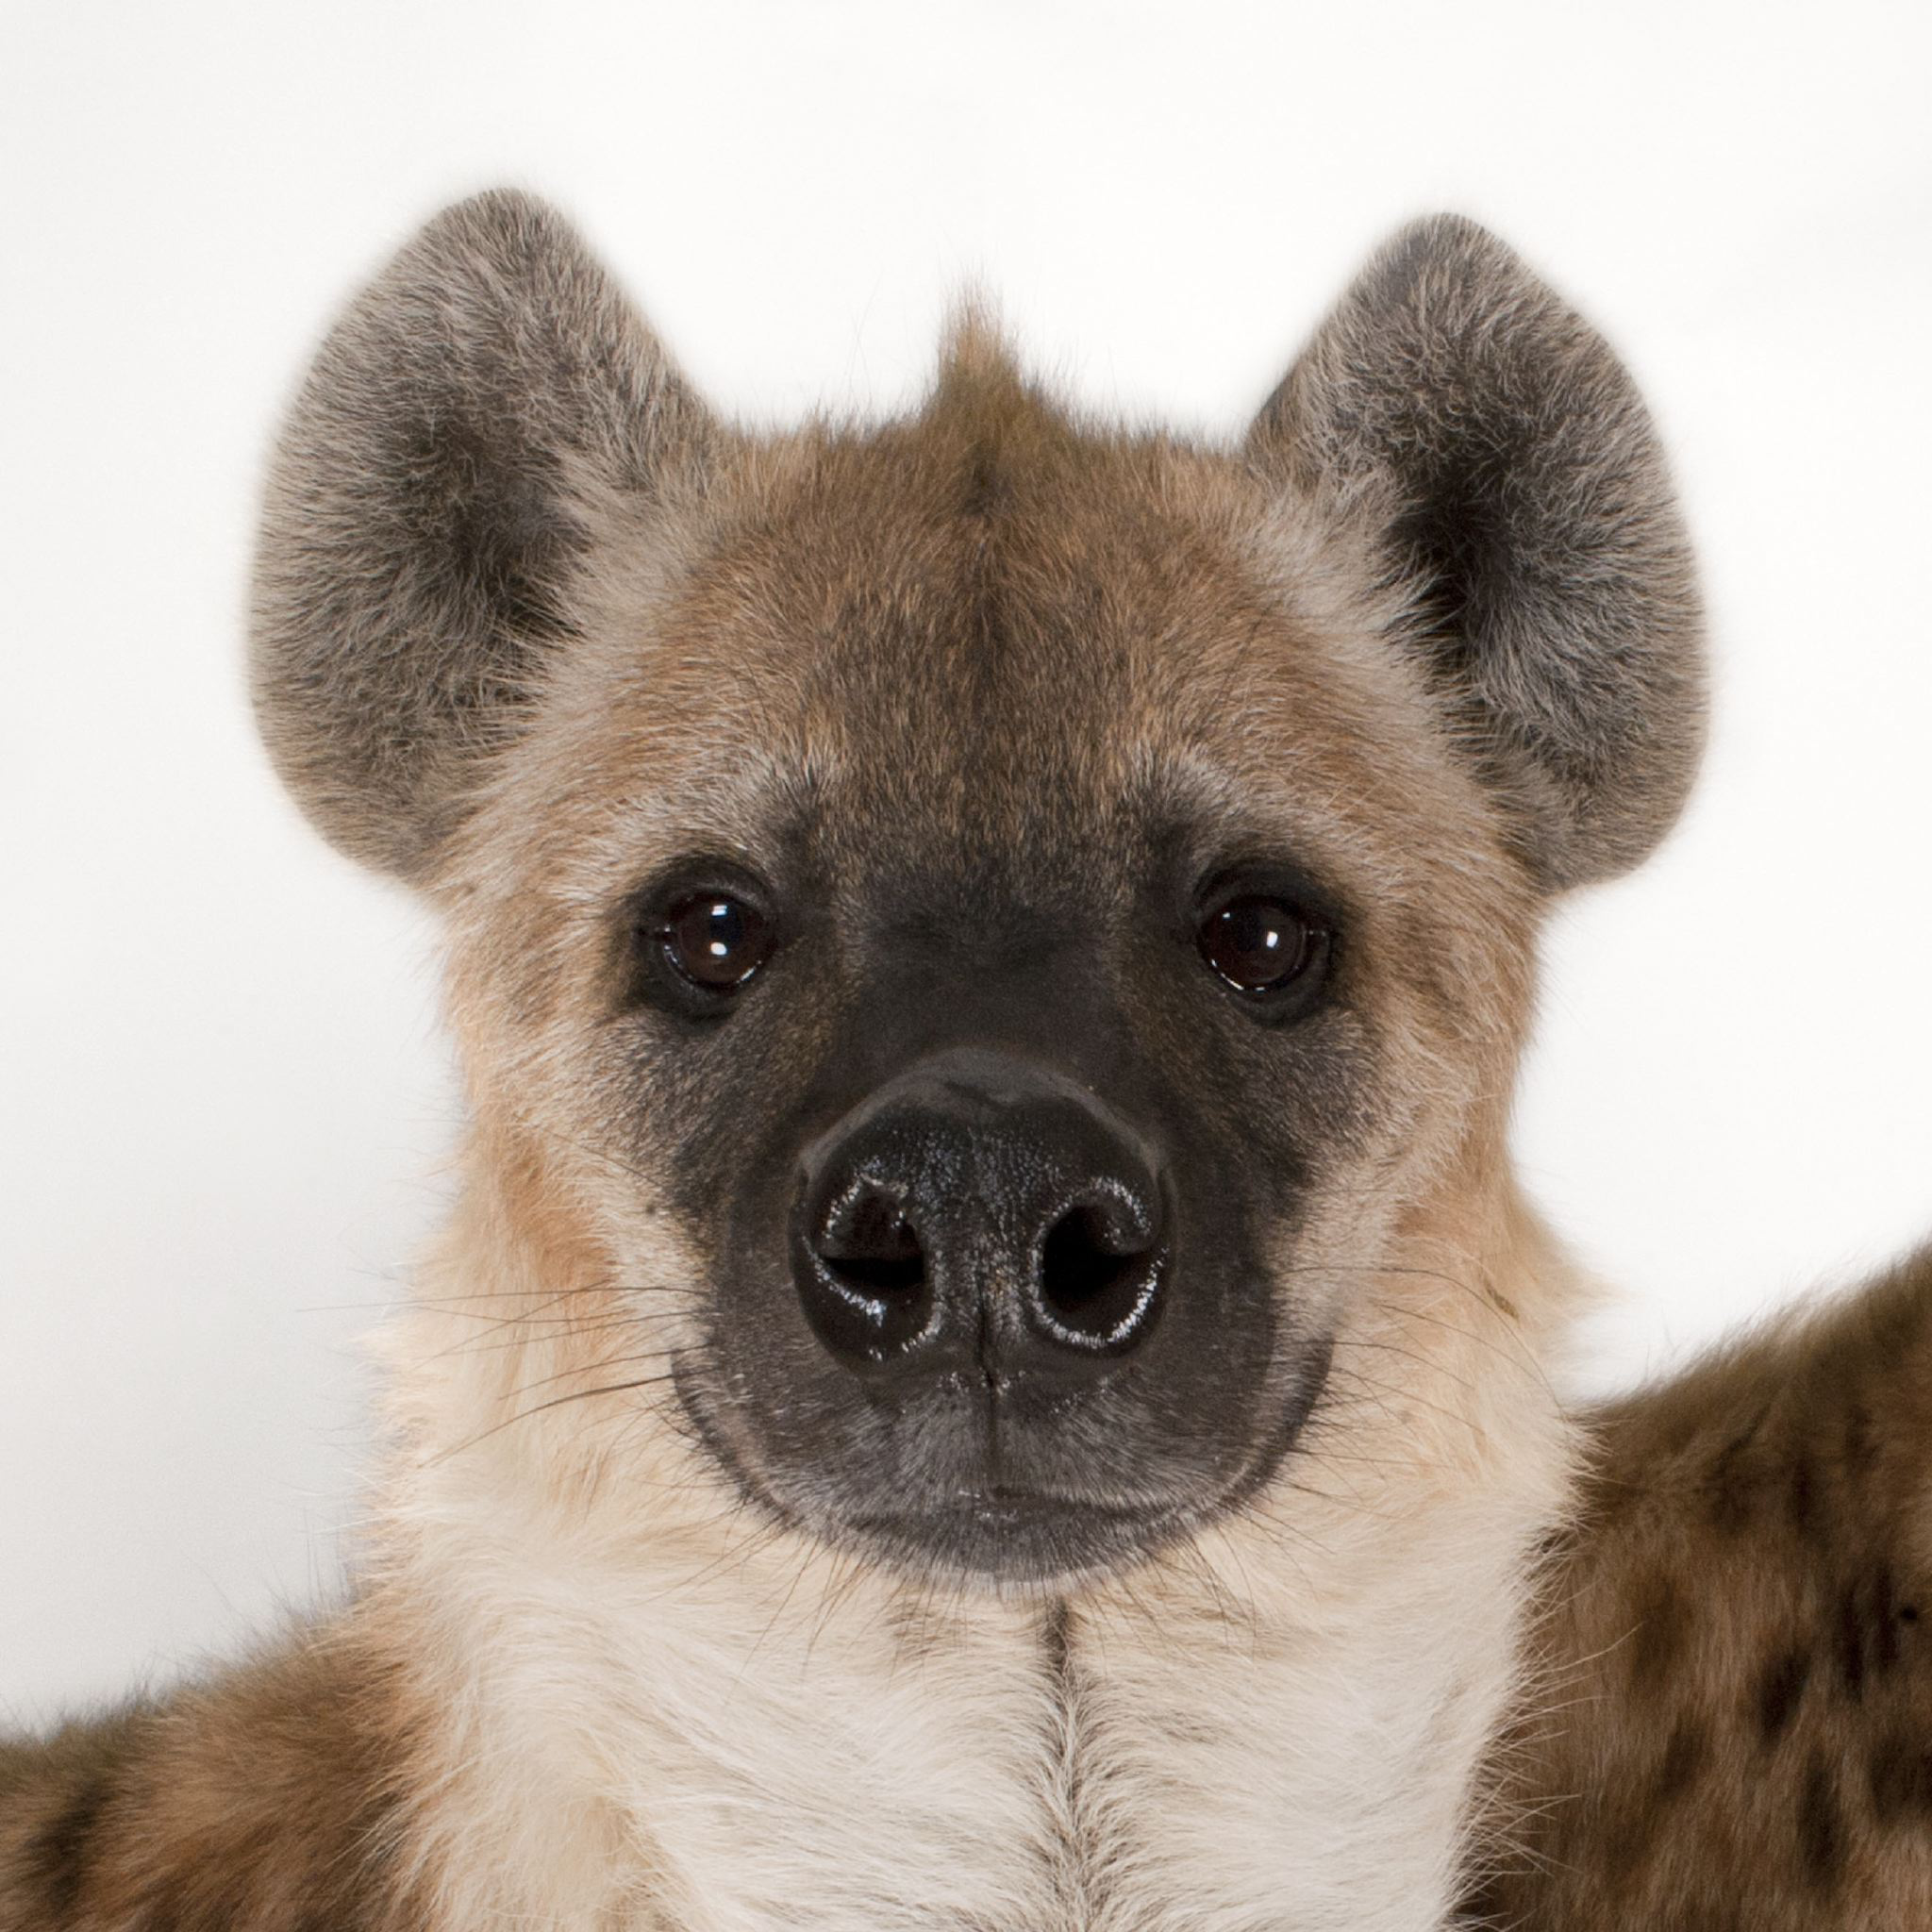

In [94]:
img = open_image(path/'spotted-hyena_thumb.jpeg')
img

In [95]:
learn = load_learner(path)

In [96]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category hyena